In [1]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [2]:
%env GALAXY_API_KEY=

env: GALAXY_API_KEY=88c98d1c08f608ace9cbf5fd766eda96


## Collection of AMR, VR counts

In [3]:
def get_summary_of_collection(gi, collection_name, history_id, column_name):
    """
    Collects the counts of datasets in a collection
    """

    datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

    #print(datasets)

    #fetch collection by name
    if len(datasets) > 1:
        print("too many datasets with that name")

    for dataset in datasets:
        if dataset['history_content_type']=='dataset_collection': #get only collections
            if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
                dataset_collection_id = dataset["id"]

    look_up = {}
    # get data of the elements in the collection
    collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)
    for element in collection['elements']:

        element_name = element['element_identifier']
        element_id = element['object']['id']
        data = gi.datasets.download_dataset(element_id, maxwait = 3)
        df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

        look_up[element_name] = len(df)
        print(element_name, len(df))

    df = pd.DataFrame(look_up.items())
    df.set_index(0, inplace=True)
    df.index.name = "Name"
    df.columns = [column_name]

    return(df)    

# Palestine Data

## Get df for AMR and VF

In [4]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

collection_name = "VFs of genes Identified by VFDB"
history_id = "737d864aaf9b7c41"
column_name = "VFs"

Palestine_VF_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

collection_name = "AMR Identifiied by NCBI"
history_id = "737d864aaf9b7c41"
column_name = "AMR"

Palestine_AMR_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

too many datasets with that name
barcode01 119
barcode02 119
barcode03 123
barcode04 119
barcode05 119
barcode06 119
barcode07 119
barcode08 119
barcode09 96
barcode10 119
barcode11 96
barcode12 119
barcode13 119
barcode14 119
barcode15 119
barcode16 119
barcode17 113
barcode18 116
barcode19 120
barcode20 90
barcode21 90
barcode22 90
barcode23 90
barcode24 90
barcode25 90
barcode26 90
barcode27 90
barcode28 90
barcode29 90
barcode30 90
barcode31 90
barcode32 90
barcode33 90
barcode34 90
barcode35 90
barcode36 90
barcode37 90
barcode38 90
barcode39 90
barcode40 90
barcode41 90
barcode42 90
barcode43 90
barcode44 90
barcode45 90
barcode46 90
barcode47 90
barcode48 90
barcode49 90
barcode50 90
barcode51 90
barcode52 90
barcode53 90
barcode54 90
barcode55 90
barcode56 90
barcode57 90
barcode58 90
barcode59 90
barcode60 90
barcode61 90
barcode62 88
barcode63 90
barcode64 90
barcode65 90
barcode66 90
barcode67 90
barcode68 90
barcode69 97
barcode70 97
barcode71 97
barcode72 97
barcode73 97
b

In [5]:
frames = [Palestine_VF_df, Palestine_AMR_df]
palestine_merged_df = pd.concat(frames, axis = 1)

#from IPython.core.display import HTML
print(palestine_merged_df.to_string())

           VFs  AMR
Name               
barcode01  119    4
barcode02  119    6
barcode03  123   10
barcode04  119   11
barcode05  119    4
barcode06  119    4
barcode07  119    4
barcode08  119    4
barcode09   96    7
barcode10  119    4
barcode11   96    7
barcode12  119    4
barcode13  119    4
barcode14  119    4
barcode15  119    4
barcode16  119    4
barcode17  113    0
barcode18  116    0
barcode19  120    0
barcode20   90   11
barcode21   90   11
barcode22   90   11
barcode23   90   11
barcode24   90   11
barcode25   90   11
barcode26   90   11
barcode27   90   11
barcode28   90   11
barcode29   90   11
barcode30   90   11
barcode31   90   11
barcode32   90   11
barcode33   90   11
barcode34   90   11
barcode35   90   11
barcode36   90   11
barcode37   90   11
barcode38   90   11
barcode39   90   11
barcode40   90   11
barcode41   90   11
barcode42   90   11
barcode43   90   11
barcode44   90   11
barcode45   90   11
barcode46   90   11
barcode47   90   11
barcode48   90   11


## Map with metadata

In [6]:
palestine_meta_df = pd.read_excel(open('data/FoodbornePathogenDetectionDataAnalysis.xlsx', 'rb'), sheet_name='Palestine') 
palestine_meta_df.set_index("Galaxy ID", inplace=True)
palestine_meta_df.index.name = "Name"
palestine_frames = [palestine_merged_df, palestine_meta_df]
palestine_result = pd.concat(palestine_frames, axis = 1)
# print(len(result.columns))
# print(len(meta_df.columns))

print(palestine_result.to_string())

           VFs  AMR Barcode Name  Barcode No.        ID Data Sequencing Source  Sequencing Date           Information         Medium  Galaxy Analysis Date  History Link  Comments
Name                                                                                                                                                                              
barcode01  119    4    barcode01            1      S231             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode02  119    6    barcode02            2      S239             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode03  123   10    barcode03            3  SF2707-H             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode04  119   11    barcode04            4  SF2710-H             Palestine              2021   Salmone

## Plot it

### Heatmap with VFs

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = palestine_result[['Medium','Information','VFs']]

VFs_heatmap_pt = pd.pivot_table(df1,values='VFs', index='Medium', columns='Information')
VFs_heatmap_pt

Information,Campylobacter jejuni,Salmonella enterica
Medium,,
Chicken Stool,93.782609,119.571429
Human Stool,91.083333,117.000000
Meat,90.000000,113.250000


In [8]:
df2 = palestine_result[['Barcode Name','Information','VFs']]

VFs_heatmap_pt_2 = pd.pivot_table(df2,values='VFs', index='Barcode Name', columns='Information')
VFs_heatmap_pt_2

Information,Campylobacter jejuni,Salmonella enterica
Barcode Name,,
barcode01,NaN,119.0
barcode02,NaN,119.0
barcode03,NaN,123.0
barcode04,NaN,119.0
barcode05,NaN,119.0
...,...,...
barcode80,97.0,NaN
barcode81,97.0,NaN
barcode82,97.0,NaN


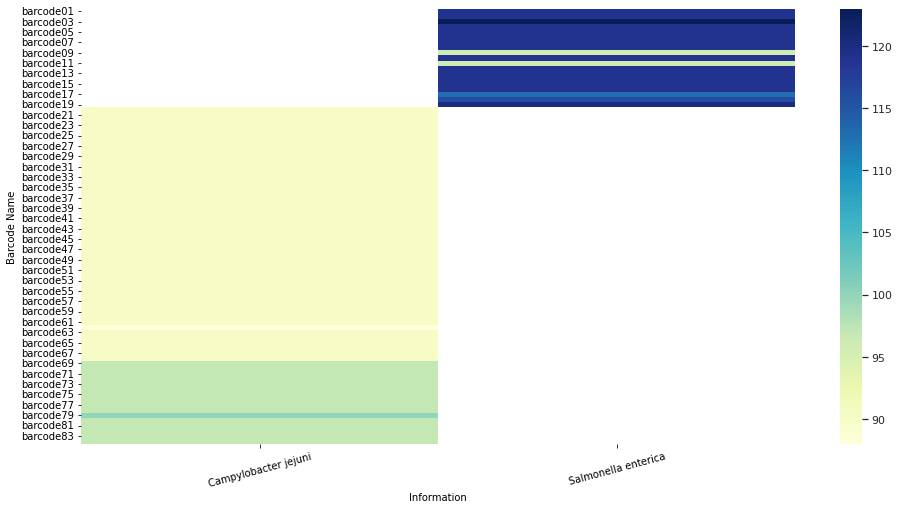

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(VFs_heatmap_pt_2, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

#### Heatmap with VF Accession IDs

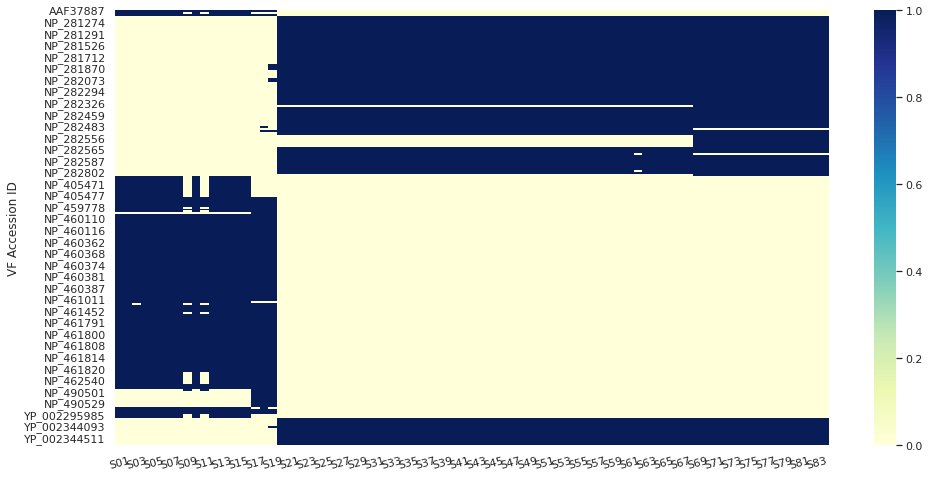

In [17]:
import scipy
palestineVFs = pd.read_csv('data/PalestineVFheatmapSampleNo.csv')
palestineVFs.set_index("VF Accession ID", inplace=True)
palestineVFs.index.name = "VF Accession ID"
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
#sns.clustermap(palestineVFs, yticklabels=True, xticklabels=True)
sns.heatmap(palestineVFs, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

#### Clusterplot with VF Accession IDs

/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


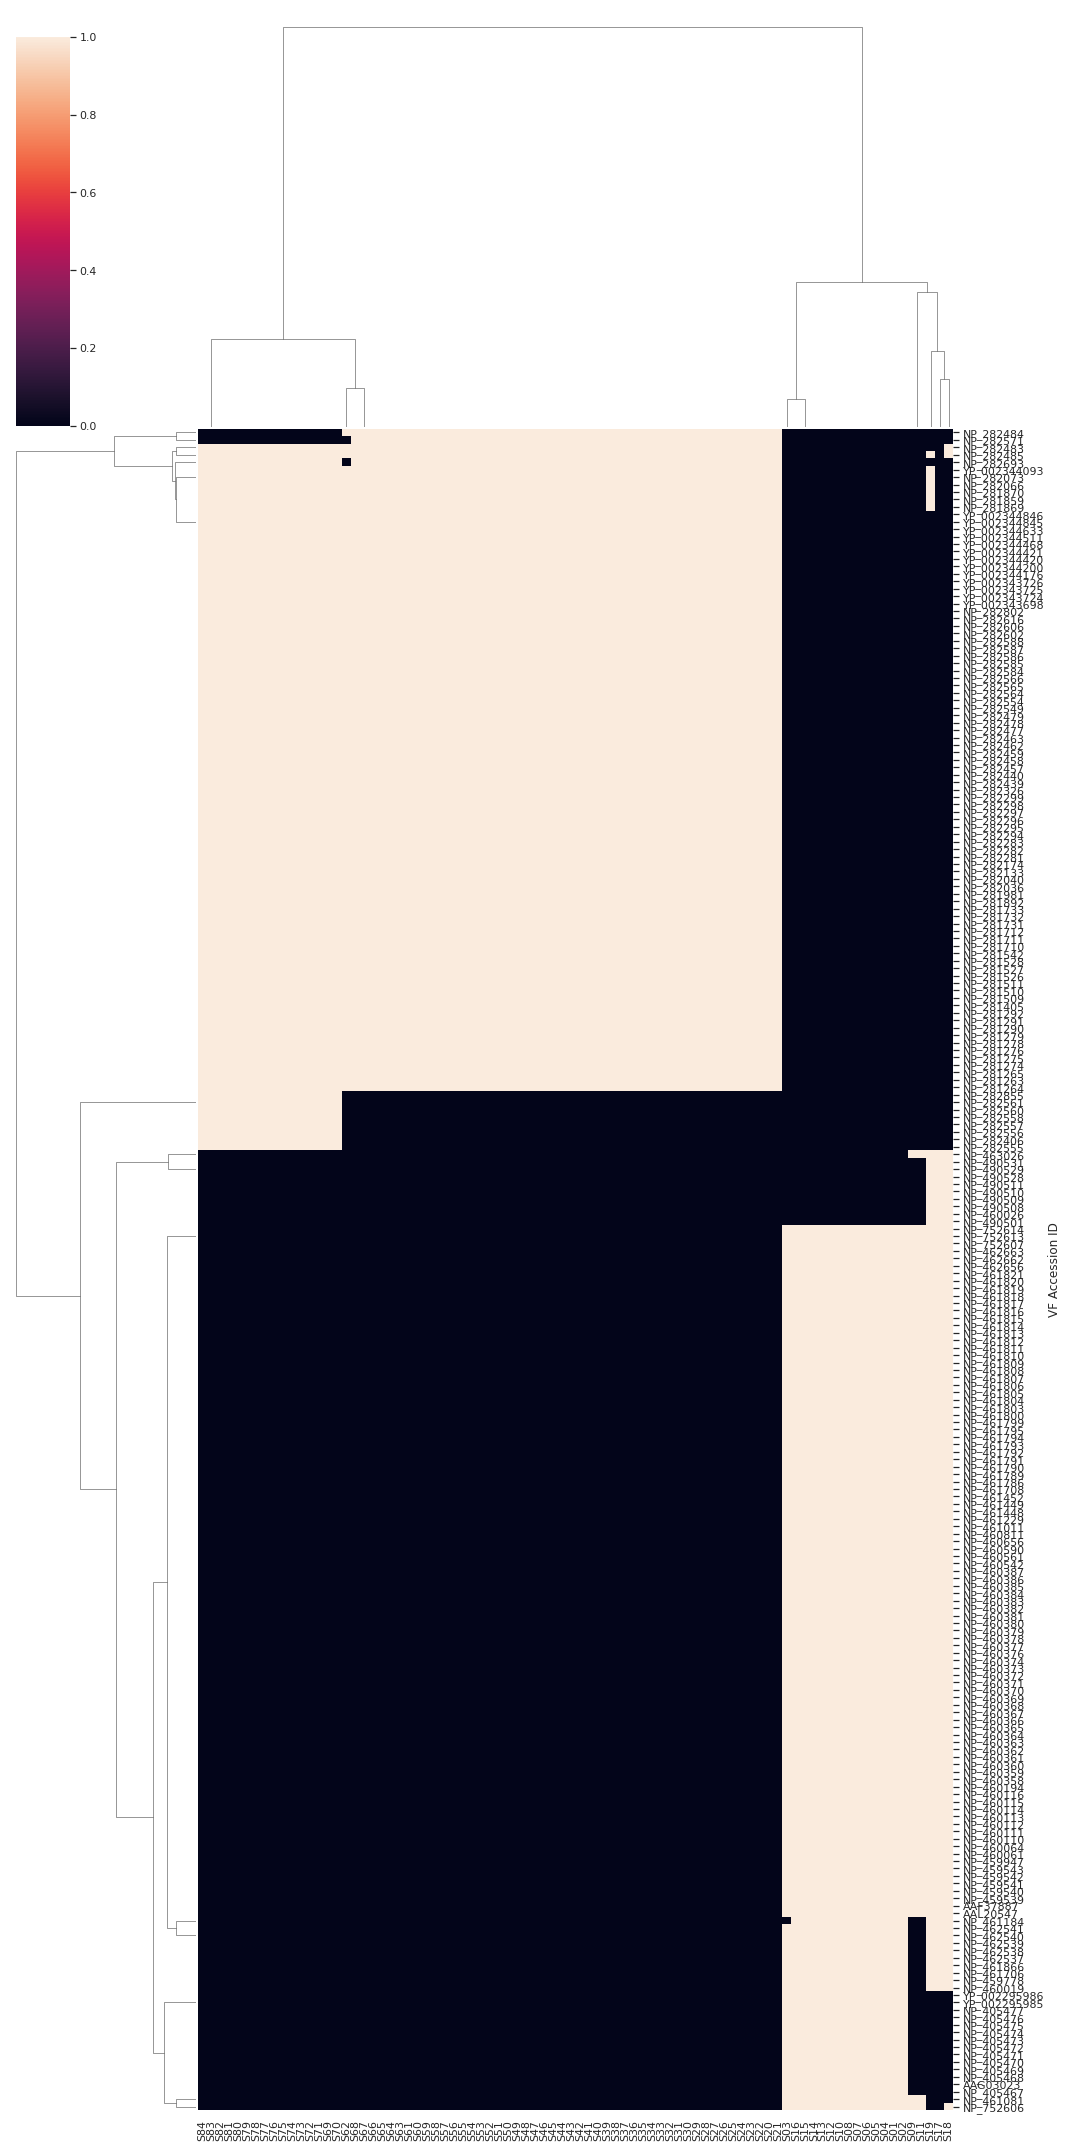

In [21]:
sns.clustermap(palestineVFs,figsize=(15, 30), yticklabels=True, xticklabels=True)


### Heatmap with AMRs

In [13]:
df3 = palestine_result[['Medium','Information','AMR']]

AMR_heatmap_pt = pd.pivot_table(df3,values='AMR', index='Medium', columns='Information')
AMR_heatmap_pt

Information,Campylobacter jejuni,Salmonella enterica
Medium,,
Chicken Stool,6.304348,6.142857
Human Stool,9.458333,1.000000
Meat,11.000000,4.750000


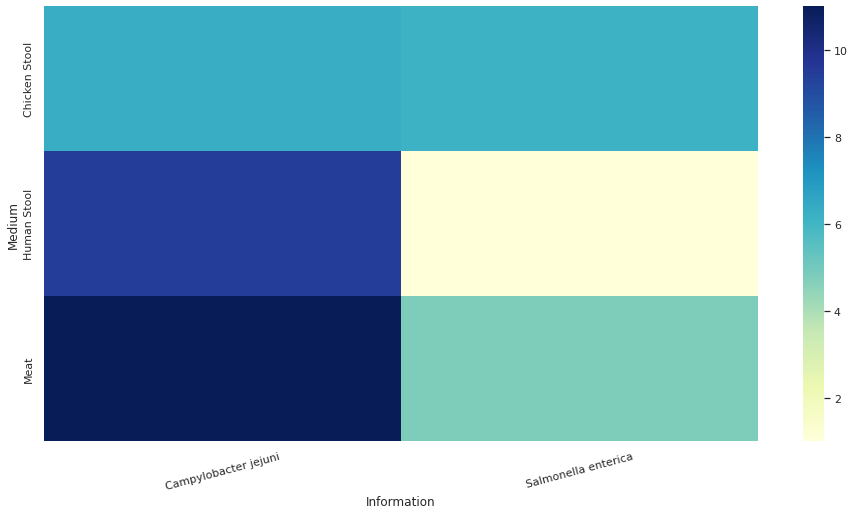

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(AMR_heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()